# ENSEMBLES & OTHERS

In this notebook I'll be concentrating on testing other ensembles but only on the 10 year dataset equivalent to the 10 most recent seasons (from 2010 to 2020). If time permits it, or even after I have handed this project, I will extend these tests to the rest of the datasets and will ultimately try to find the most optimum number of year to consider for Regular Season Game Predictions.

As always I will start importing all thee necessary libraries and probably I will end up importing some that I won't have to use, but will do as I will continue with this project.

# Importing libraries and data loading

In [5]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb


from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


In [6]:
df = pd.read_csv('2010-2020_Model_Ready.csv', index_col=0)
df.head()

,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,1,96.0,46.5,43.2,38.0,112.2,114.2,46.9,1.89,106.09,86.8,46.3,36.8,38.0,107.5,99.1,51.1,1.26,104.23
1,1,87.5,45.7,29.0,33.6,107.9,96.8,51.4,1.54,101.00,84.0,49.6,29.5,36.7,112.9,107.5,49.6,1.35,101.50
2,1,94.0,41.1,36.2,29.3,103.7,109.6,45.2,1.81,101.80,86.0,46.3,35.8,41.9,104.9,114.2,47.3,1.30,103.00
3,0,81.6,47.8,26.8,41.8,106.3,110.4,50.9,1.23,101.70,91.5,44.8,24.0,36.5,105.3,108.5,45.8,2.00,99.88
4,1,86.5,46.0,32.0,32.8,105.5,107.7,53.1,1.32,100.50,90.5,39.5,33.0,28.8,97.2,94.7,49.2,1.77,98.75


Remember that this data has been cleaned and conditioned to start with the models directly. Still I will do a couple of checks just in case and to remind me of a few details about the data itself

In [7]:
df.shape

(12198, 19)

In [8]:
print(df.Game_Result[0:5])

0    1
1    1
2    1
3    0
4    1
Name: Game_Result, dtype: int64


Before I start testing some of the Ensemble methods I will create a box plot of all each column in my 10 season stats dataframe to see if there is anything that needs to be further adjusted/cleaned.

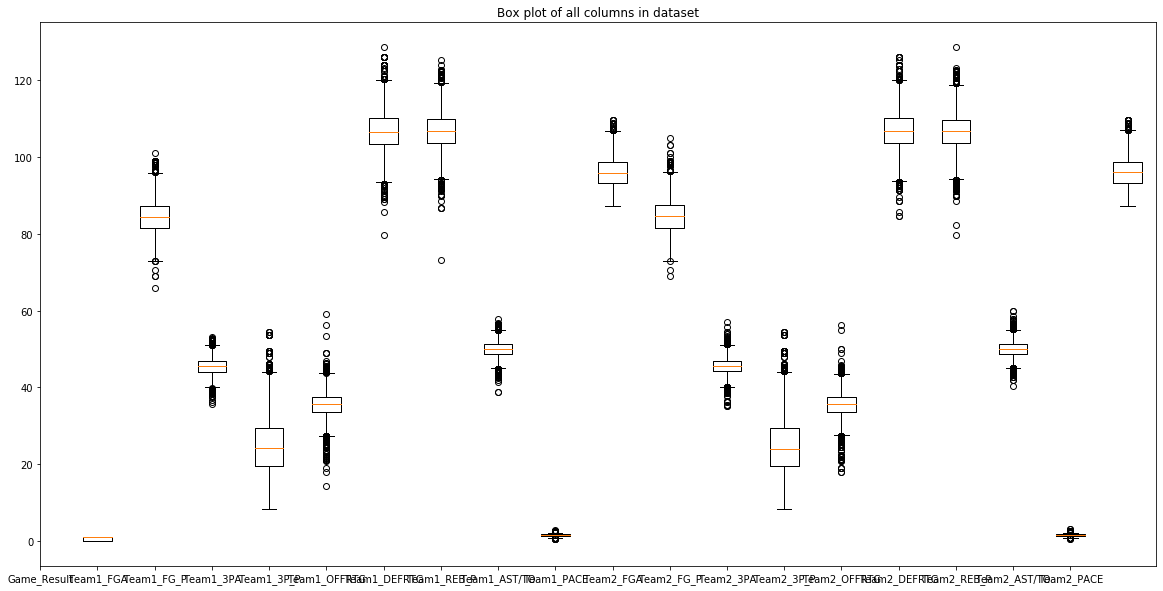

In [12]:
# Create a box plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(len(df.columns.values)), df.columns.values)
plt.show()

Even when there seems to be some outliers, in fact, there aren't. The reason is because this data is a series of basketball stats, and normally those values that might be irregular performances are very important, therefore I cannot filter/erase them.

Because this will be the same data set used for different ensemble method, I will only have to create target (y) and features (X) once, and the same goes for splitting thee data:

In [13]:
# Create features (X) and target (y)
y = df['Game_Result']
X = df.drop(['Game_Result'], axis=1)

In [14]:
# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

Generating the Model

# SVM Linear Classifier

## Creating the SVM Classifier

In [15]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

## Training the Model and Predicting 

In [16]:
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating the Model

Let's estimate how accurately the classifier/model can predict the Game_Result, which translates as the Home Team (Team1) winning the game

The way to do this is by computing the accuracy, which can be done by comparing actual test set values and predicted values

In [17]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7188456493222563


71.88% is not a bad accuracy to start with. Lets look at other metrics now:

In [18]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7363344051446945
Recall: 0.8109972041006523


Both, the precision and recall are quite good, in particular the Recall of 81.10%.

# SCV Prediction 

In [19]:
# SVC prediction model attempt (gamma set to 'scale')

clf = SVC(gamma='scale',probability=True)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7157848710100568

An accuracy of 71.58%, very close to the SVM Linear Classifier

# BaggingSVC Enseemble Classification

In [20]:
#BaggingSVC Ensemble classification

advclf = BaggingClassifier(base_estimator=SVC(gamma='scale'), n_estimators=10, random_state=0)
advclf.fit(X_train, y_train)
advclf.score(X_test,y_test)

0.7162221250546568

# Adaboost & Gradient Boosting Classifier

In [21]:
# TRAINING THE MODELS

# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

In [22]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [23]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [24]:
# Using the models to predict labels on both training and test sets

# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [25]:
# Calculating the accuracy and f1-score for each model:

def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7340983606557377
F1-Score: 0.7835601814785161

Model: Gradient Boosted Trees
Accuracy: 0.7934426229508197
F1-Score: 0.8324468085106382

Testing Metrics
Model: AdaBoost
Accuracy: 0.6935942282466113
F1-Score: 0.7480449438202247

Model: Gradient Boosted Trees
Accuracy: 0.7052907739396589
F1-Score: 0.7594145993217919


## Confusion Matrix

In [26]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[2184, 1599],
       [1204, 4161]])

In [27]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[2197, 1586],
       [1110, 4255]])

In [28]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.64      0.58      0.61      3783
           1       0.72      0.78      0.75      5365

    accuracy                           0.69      9148
   macro avg       0.68      0.68      0.68      9148
weighted avg       0.69      0.69      0.69      9148



In [29]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.66      0.58      0.62      3783
           1       0.73      0.79      0.76      5365

    accuracy                           0.71      9148
   macro avg       0.70      0.69      0.69      9148
weighted avg       0.70      0.71      0.70      9148



As a final performance check, let's calculate the 5-fold cross-validated score for each model!

In [30]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X, y, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):
0.7070028700287002


In [31]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, y, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.7104454257657331


# XGBOOST

In [32]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_df, y)

In [33]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 74.5%
Validation accuracy: 71.21%


## Tuning XGBOOST

In [34]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [35]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(scaled_df, y)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 10
n_estimators: 30
subsample: 0.7

Training Accuracy: 75.03%
Validation accuracy: 75.18%
